Data Analysis and Visualization using Advanced Excel

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----------------------------------------
# Step 1: Load Excel Data
# ----------------------------------------

# Read all sheets from Excel
excel_file = "sales_data.xlsx"
sales_df = pd.read_excel(excel_file, sheet_name="Sales")
customers_df = pd.read_excel(excel_file, sheet_name="Customers")
products_df = pd.read_excel(excel_file, sheet_name="Products")

print("Sales Data:")
display(sales_df.head())

print("\nCustomers Data:")
display(customers_df.head())

print("\nProducts Data:")
display(products_df.head())


Sales Data:


,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region,TotalRevenue
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55



Customers Data:


,CustomerID,CustomerName,Region
0,1,Customer_1,West
1,2,Customer_2,South
2,3,Customer_3,West
3,4,Customer_4,East
4,5,Customer_5,West



Products Data:


,Product,Price
0,Laptop,1500
1,Tablet,500
2,Smartphone,1200
3,Monitor,300
4,Keyboard,50


In [3]:
# ----------------------------------------
# Step 2: Data Cleaning (Excel-like "Format as Table")
# ----------------------------------------

# Remove duplicates
sales_df.drop_duplicates(inplace=True)

# Handle missing values (e.g., fill with 0)
sales_df["Quantity"].fillna(0, inplace=True)

# Convert OrderDate to datetime
sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])


In [4]:
# ----------------------------------------
# Step 3: Advanced Excel Formulas (VLOOKUP, SUMIF)
# ----------------------------------------

# VLOOKUP: Merge Customer Name into Sales Data
sales_df = pd.merge(sales_df, customers_df, on="CustomerID", how="left")

# VLOOKUP: Merge Product Price into Sales Data
sales_df = pd.merge(sales_df, products_df[["Product", "Price"]], on="Product", how="left")

# SUMIF: Calculate Total Revenue (Quantity * Price)
sales_df["TotalRevenue"] = sales_df["Quantity"] * sales_df["Price_y"]

print("\nMerged Data with Revenue:")
display(sales_df.head())



Merged Data with Revenue:


,OrderID,CustomerID,Product,Quantity,Price_x,OrderDate,Region_x,TotalRevenue,CustomerName,Region_y,Price_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,250,Customer_413,South,50
1,2,500,Smartphone,6,1497.86,2023-01-02,South,7200,Customer_500,North,1200
2,3,925,Smartphone,1,465.75,2023-01-03,North,1200,Customer_925,South,1200
3,4,55,Monitor,3,1896.86,2023-01-04,East,900,Customer_55,South,300
4,5,502,Smartphone,5,1725.11,2023-01-05,South,6000,Customer_502,West,1200


In [5]:
# ----------------------------------------
# Step 4: PivotTables (Excel-like Summarization)
# ----------------------------------------

# Create a PivotTable: Total Revenue by Region and Product
pivot_table = pd.pivot_table(
    sales_df,
    values="TotalRevenue",
    index="Region_y",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

print("\nPivotTable (Revenue by Region & Product):")
display(pivot_table)



PivotTable (Revenue by Region & Product):


Product,Keyboard,Laptop,Monitor,Smartphone,Tablet
Region_y,,,,,
East,134350,3720000,729900,2844000,1281500
North,121550,3567000,738000,3246000,1346000
South,116150,3415500,710700,2946000,1164500
West,129700,3732000,803100,3068400,1376500


C:\Users\OJAS VIJAY AMBEKAR\AppData\Local\Temp\ipykernel_12348\1143578018.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)


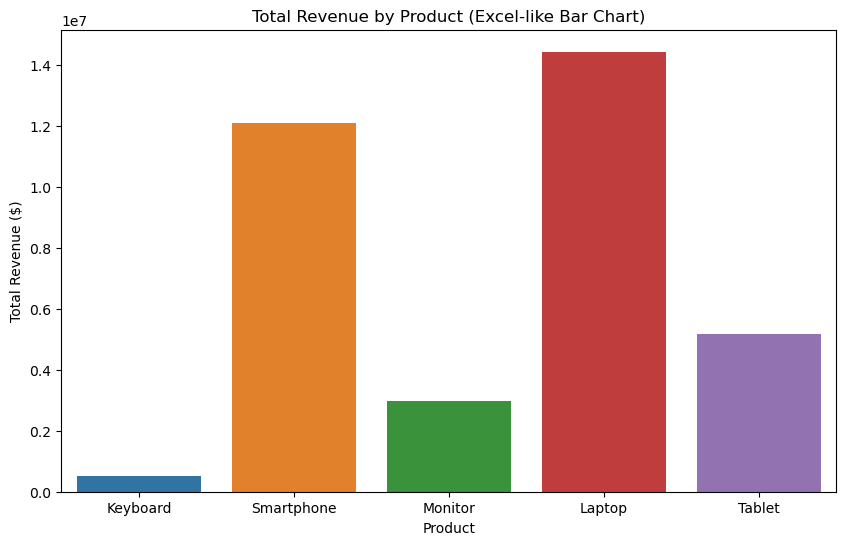

C:\Users\OJAS VIJAY AMBEKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OJAS VIJAY AMBEKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


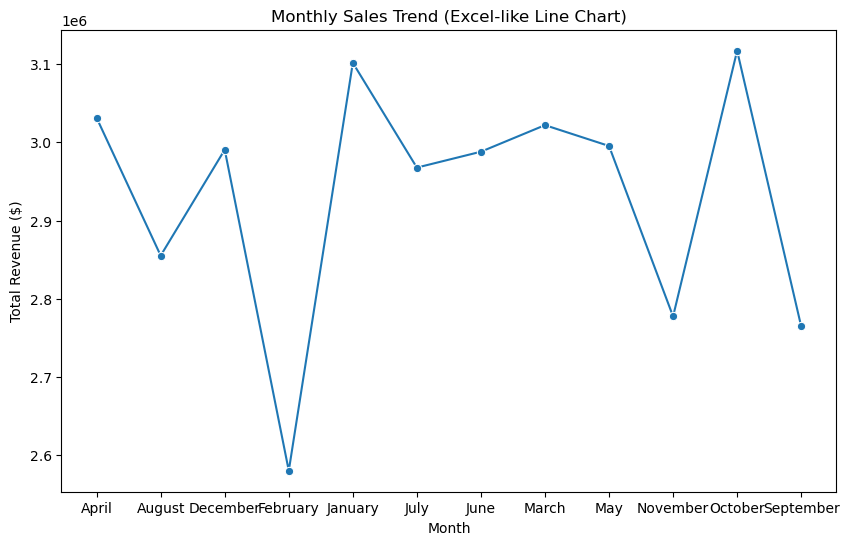

In [6]:
# ----------------------------------------
# Step 5: Visualization (Excel-like Charts)
# ----------------------------------------

# Bar Chart: Total Revenue by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)
plt.title("Total Revenue by Product (Excel-like Bar Chart)")
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.show()

# Line Chart: Monthly Sales Trend
sales_df["Month"] = sales_df["OrderDate"].dt.month_name()
monthly_sales = sales_df.groupby("Month")["TotalRevenue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="Month", y="TotalRevenue", marker="o")
plt.title("Monthly Sales Trend (Excel-like Line Chart)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.show()


In [7]:
# ----------------------------------------
# Step 6: Export Results to Excel
# ----------------------------------------

with pd.ExcelWriter("analysis_results.xlsx") as writer:
    sales_df.to_excel(writer, sheet_name="Processed Sales", index=False)
    pivot_table.to_excel(writer, sheet_name="PivotTable")